model_name        2149
task_id           2149
candidate_id      2149
metric            2149
error_type        2149
error_msg         2149
code_candidate    2149
test_result        200
stderr            2149
stdout            2149
phase             2149
seed              2149
temperature       2149
top_p             2149
top_k             2149
created_at        2149
eval_method       2149
fold              2149
dtype: int64
Index(['model_name', 'task_id', 'candidate_id', 'metric', 'error_type',
       'error_msg', 'code_candidate', 'test_result', 'stderr', 'stdout',
       'phase', 'seed', 'temperature', 'top_p', 'top_k', 'created_at',
       'eval_method', 'fold', 'syntax_error', 'syntax_parsing_error',
       'syntax_category', 'semantic_error', 'semantic_category',
       'tests_category', 'tests_error'],
      dtype='object')
['syntax' 'semantic' 'tests']
  category  count  percentage
0      0/3    136        68.0
1      1/3     43        21.5
2      2/3     21        10.5


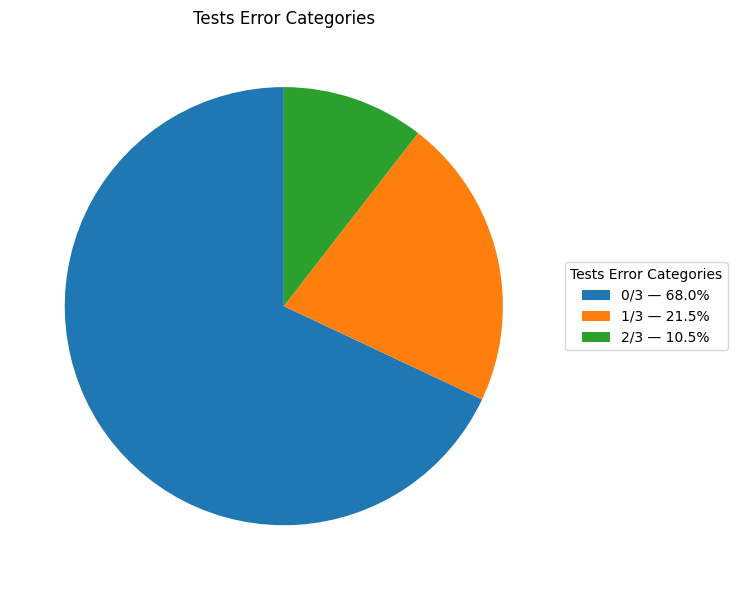

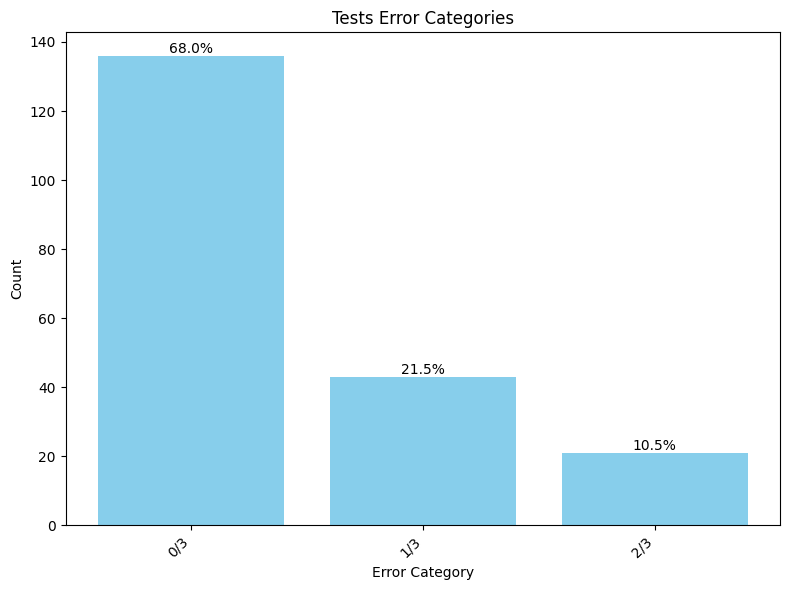

,model_name,task_id,candidate_id,metric,error_type,error_msg,code_candidate,test_result,stderr,stdout,phase,seed,temperature,top_p,top_k,created_at,eval_method,fold,syntax_error,syntax_parsing_error,syntax_category,semantic_error,semantic_category,tests_category,tests_error
134,llama3.2:3b-instruct-fp16,8,1,tests,tests,[],"import(""std"", Std_k98ojb)\nimport(""http"", Http_q7o96c)\n\nmodule() main { \n func(doc: ""check whether the entered number is greater than the elements of the given array."") check_greater {\n in(x: -33, y: -26, name: ""n"") property(Number) n_a6cea7\n\n in(x: -294, y: 155, name: ""list"") property(Any) list_0b075e\n\n out(x: 546, y: 63, name: ""output"") property(Bool) output_b1d7f8\n\n instance(x: 12, y: 70) greaterthan_9c2a4d root.Std_k98ojb.Math.GreaterThan {}\n instance(x: 18, y: -23,) filter_0e3c5f root.Std_k98ojb.Iteration.Filter {}\n list_0b075e -> filter_0e3c5f.items\n n_a6cea7 -> greaterthan_9c2a4d.left\n greaterthan_9c2a4d.right -> filter_0e3c5f.value\n filter_0e3c5f.result -> output_b1d7f8\n }\n\n \n\n instance(x: -43, y: 24) check_greater_6bfc94 root.main.check_greater {}\n}\nmodule(doc: ""Contains three different tests for the 'check_greater' function node"") tests {\n instance(x: 444, y: 209) check_greater_0e0818 root.main.check_greater {}\n instance(x: -12, y: -66) test_7f8863 root.Std_k98ojb.Testing.Test {\n name: ""Test check_greater""\n }\n data_instance(x: 450, y: 343) data_7534e8 = [1, 2, 3, 4, 5]\n instance(x: 819, y: 208) check_greater_c1b8fc root.main.check_greater {}\n instance(x: 795, y: 85) asserttrue_06b1c1 root.Std_k98ojb.Testing.AssertTrue {}\n data_instance(x: 826, y: 342) data_a93579 = [2, 3, 4, 5, 6]\n instance(x: 1207, y: 209) check_greater_962a95 root.main.check_greater {}\n instance(x: 1184, y: 86) asserttrue_d04ae1 root.Std_k98ojb.Testing.AssertTrue {}\n data_instance(x: 1214, y: 344) data_a7d27f = [9, 7, 4, 8, 6, 1]\n instance(x: 416, y: 90) assertfalse_dce4a1 root.Std_k98ojb.Testing.AssertFalse {}\n data_7534e8 -> check_greater_0e0818.list_0b075e\n 4 -> check_greater_0e0818.n_a6cea7\n check_greater_c1b8fc.output_b1d7f8 -> asserttrue_06b1c1.value\n data_a93579 -> check_greater_c1b8fc.list_0b075e\n 8 -> check_greater_c1b8fc.n_a6cea7\n check_greater_962a95.output_b1d7f8 -> asserttrue_d04ae1.value\n data_a7d27f -> check_greater_962a95.list_0b075e\n 11 -> check_greater_962a95.n_a6cea7\n asserttrue_06b1c1.continue -> asserttrue_d04ae1.execute\n assertfalse_dce4a1.continue -> asserttrue_06b1c1.execute\n test_7f8863.onRun -> assertfalse_dce4a1.execute\n check_greater_0e0818.output_b1d7f8 -> assertfalse_dce4a1.value\n\n\n }","{'num_tests': 1, 'num_passed': 0, 'test_results': [{'name': 'Test check_greater', 'assertions': [{'kind': 'Passed', 'expect': 'null', 'actual': 'null'}, {'kind': 'Failed', 'expect': 'true', 'actual': 'null'}, {'kind': 'Failed', 'expect': 'true', 'actual': 'null'}], 'passed': False}]}",,"Installing dependencies for midio_example@0.1.0\n\nNo external dependencies\n\nBuilding package...\nPackage built successfully!\n\n{\n ""num_tests"": 1,\n ""num_passed"": 0,\n ""test_results"": [\n {\n ""name"": ""Test check_greater"",\n ""assertions"": [\n {\n ""kind"": ""Passed"",\n ""expect"": ""null"",\n ""actual"": ""null""\n },\n {\n ""kind"": ""Failed"",\n ""expect"": ""true"",\n ""actual"": ""null""\n },\n {\n ""kind"": ""Failed"",\n ""expect"": ""true"",\n ""actual"": ""null""\n }\n ],\n ""passed"": false\n }\n ]\n}",testing,3,0.2,0.9,10,2025-04-07 21:25:20.759,3_fold,0,,[],Other syntax error,None,{Other Semantic Error},1/3,"1/3 tests passed.\n Test results:\nFailed test: expected `true`, got `null`\nFailed test: expected `true`, got `null`\n"
135,llama3.2:3b-instruct-fp16,8,2,tests,tests,[],"import(""std"", Std_k98ojb)\nimport(""http"", Http_q7o96c)\n\nmodule() main { \n func(doc: ""check whether the entered number is greater than the elements of the given array."") check_greater {\n in(x: -33, y: -26, name: ""n"") property(Number) n_a6cea7\n\n in(x: -294, y: 15

In [3]:
import re
import os
import subprocess
import sys
from matplotlib import pyplot as plt
import pandas as pd


sys.path.append('../../')  # Add the path to the my_packages module
os.environ['EXPERIMENT_DB_NAME'] = "few_shot_experiments"
from my_packages.analysis.error_analysis import categorize_semantic_errors, categorize_syntax_error, categorize_syntax_parsing_error, categorize_test_errors, extract_semantic_errors, extract_test_error, get_error_category_counts, make_categories_bar_chart, make_categories_pie_chart
from my_packages.db_service.error_service import delete_error_docs, errors_to_df, pretty_print_errors
from my_packages.evaluation.midio_compiler import compile_code, is_code_syntax_valid
from my_packages.db_service.experiment_service import experiment_exists, pretty_print_experiment_collections, run_experiment_quality_checks, setup_experiment_collection

experiment_name = f"signature_similarity_5_shot"
error_type = "tests"
filter = {
    "eval_method": "3_fold",
    "model_name": "llama3.2:3b-instruct-fp16",
    "phase": "testing",
}
# Categorize and extract errors:
df = errors_to_df(experiment_name, filter=filter)
print(df.count())
df["syntax_error"] = df["stderr"]
df["syntax_parsing_error"] = df["stderr"].apply(categorize_syntax_parsing_error)
df["syntax_category"] = df["stderr"].apply(categorize_syntax_error)

df["semantic_error"] = df["error_msg"].apply(extract_semantic_errors)
df["semantic_category"] = df["error_msg"].apply(categorize_semantic_errors)

df["tests_category"] = df["test_result"].apply(categorize_test_errors)
df["tests_error"] = df.apply(
    lambda row: extract_test_error(row["tests_category"], row["error_msg"], row["test_result"]),
    axis=1
)

filtered_df = df[
    (df["error_type"] == error_type) 
    # & (df[f"{error_type}_category"] == {'Symbol Resolution Error'})
    # & (df[f"syntax_parsing_error"] == '[Parsing failed]') 

]
print(filtered_df.columns)


# Show all rows
pd.set_option('display.max_rows', None)     

# Show all columns
pd.set_option('display.max_columns', None)

# Show full content in each cell
pd.set_option('display.max_colwidth', None)

print(df["error_type"].unique())


errors_count_df = get_error_category_counts(filtered_df, f"{error_type}_category")
print(errors_count_df)

make_categories_pie_chart(errors_count_df, title=f"{error_type.capitalize()} Error Categories")
make_categories_bar_chart(errors_count_df, title=f"{error_type.capitalize()} Error Categories")


filtered_df.head(50)



In [ ]:
import re
import os
import subprocess
import sys
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

sys.path.append('../../')  # Add the path to the my_packages module
os.environ['EXPERIMENT_DB_NAME'] = "few_shot_experiments"

from my_packages.analysis.error_analysis import (
    categorize_semantic_errors, 
    categorize_syntax_error, 
    categorize_syntax_parsing_error,
    categorize_test_errors, 
    extract_semantic_errors, 
    extract_test_error, 
    get_error_category_counts, 
    make_categories_bar_chart, 
    make_categories_pie_chart
)
from my_packages.db_service.error_service import delete_error_docs, errors_to_df, pretty_print_errors
from my_packages.evaluation.midio_compiler import compile_code, is_code_syntax_valid
from my_packages.db_service.experiment_service import experiment_exists, pretty_print_experiment_collections, run_experiment_quality_checks, setup_experiment_collection

def categorize_erors(experiment_name: str,
                     metric: str,
                     filter: dict = {
                         "eval_method": "3_fold",
                         "model_name": "llama3.2:3b-instruct-fp16",
                         "phase": "testing",
                     },
                     ):
    # Categorize and extract errors
    df = errors_to_df(experiment_name, filter=filter)
    if metric == "syntax":
        df["syntax_error"] = df["stderr"]
        df["syntax_parsing_error"] = df["stderr"].apply(categorize_syntax_parsing_error)
        df["syntax_category"] = df["stderr"].apply(categorize_syntax_error)
    elif metric == "semantic":
        df["semantic_error"] = df["error_msg"].apply(extract_semantic_errors)
        df["semantic_category"] = df["error_msg"].apply(categorize_semantic_errors)
    elif metric == "tests":
        df["tests_category"] = df["test_result"].apply(categorize_test_errors)
        df["tests_error"] = df.apply(
            lambda row: extract_test_error(row["tests_category"], row["error_msg"], row["test_result"]),
            axis=1
        )
    return df

def get_all_errors_comparison(metric, parsing_errors = True):
    rows = []
    for model in ["llama3.2:3b-instruct-fp16", "llama3.3:70b-instruct-fp16", "phi4:14b-fp16"]:
        for prompt in ["regular", "signature"]:
            for shots in [5]:
                df = categorize_erors(
                    experiment_name=f"{prompt}_similarity_{shots}_shot",
                    metric=metric,
                    filter={"eval_method": "3_fold", "model_name": model, "phase": "testing"},
                )
                filtered_df = df[df["error_type"] == metric]
                if parsing_errors:
                    filtered_df = filtered_df[filtered_df["syntax_category"] == "Parsing failed"]
                    errors_count_df = get_error_category_counts(filtered_df, f"{metric}_parsing_error")
                else:
                    errors_count_df = get_error_category_counts(filtered_df, f"{metric}_category")
            
                # Loop over each error category row and append as individual rows
                # make_categories_pie_chart(errors_count_df, title=f"{error_type.capitalize()} Error Categories")
                # make_categories_bar_chart(errors_count_df, title=f"{error_type.capitalize()} Error Categories")
                for _, row in errors_count_df.iterrows():
                    rows.append({
                        "model": model,
                        "prompt": prompt,
                        "shots": shots,
                        "category": row["category"],
                        "count": row["count"],
                        "percentage": row["percentage"],
                    })
    return pd.DataFrame(rows)

comparison_df = get_all_errors_comparison("syntax")

fig, axs = plt.subplots(2, 3, figsize=(9, 4.2))  # Slightly shorter height
models = ["llama3.2:3b-instruct-fp16", "phi4:14b-fp16", "llama3.3:70b-instruct-fp16"]
prompts = ["regular", "signature"]

for row_idx, prompt in enumerate(prompts):
    for col_idx, model in enumerate(models):
        ax = axs[row_idx, col_idx]
        df = comparison_df[
            (comparison_df["prompt"] == prompt) & (comparison_df["model"] == model)
        ]

        df = df.sort_values(by="percentage", ascending=False).head(5)
        df = df.sort_values(by="percentage", ascending=True)

        bars = ax.barh(df["category"], df["percentage"], color="#aed6f1", edgecolor="gray")

        for bar in bars:
            width = bar.get_width()
            ax.text(width + 0.6, bar.get_y() + bar.get_height() / 2,
                    f"{width:.1f}", va="center", fontsize=5)

        # Enhance title
        model_label = model.upper()
        ax.set_title(model_label, fontsize=7, fontweight='bold')
        ax.set_xlim(0, 50)
        ax.set_xlabel("Percentage", fontsize=6)
        ax.set_ylabel(f"({prompt.capitalize()} prompt)\n Unexpected Tokens", fontsize=6) if col_idx == 0 else ax.set_ylabel("")
        ax.tick_params(axis='both', labelsize=5)
        ax.spines[['top', 'right']].set_visible(False)

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.3, hspace=0.60)
# plt.tight_layout(pad=0.1)
plt.savefig("top5_unexpected_tokens_all_models_compact.png", dpi=300)
plt.show()


ValueError: Collection 'regular_similarity_5_shot_errors' is empty in MongoDB.